<a href="https://colab.research.google.com/github/daniribeirof/UB_DS-ML_Capstone-project_Bicing-predictions/blob/main/04_Clusters_stations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Required libraries:

In [ ]:
import os
import pandas as pd
import numpy as np
import folium

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load processed Data Frames:**
All data processement can be check on file:

[01_DF_creation_Station&Bicing_info](https://colab.research.google.com/drive/1L4QHje5e7tBrphzDqBJ0FZrVmALJmC0g?usp=sharing)


## DF Bicing: 2019-2022

In [ ]:
df = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_final.csv')

In [ ]:
df.shape

(2967415, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967415 entries, 0 to 2967414
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  int64  
 1   lat                         float64
 2   lon                         float64
 3   altitude                    float64
 4   address                     object 
 5   post_code                   int64  
 6   capacity                    int64  
 7   date                        object 
 8   year                        int64  
 9   month                       int64  
 10  day                         int64  
 11  day_of_week                 int64  
 12  hour                        int64  
 13  percentage_docks_available  float64
 14  ctx-4                       float64
 15  ctx-3                       float64
 16  ctx-2                       float64
 17  ctx-1                       float64
dtypes: float64(8), int64(8), object(2)
memory usage: 407.5+ MB


In [ ]:
df.head()

,station_id,lat,lon,altitude,address,post_code,capacity,date,year,month,day,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,4,0.72,0.68,0.73,0.74,0.72
1,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,9,0.58,0.67,0.63,0.62,0.61
2,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,14,0.75,0.62,0.67,0.74,0.75
3,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,19,0.65,0.76,0.72,0.69,0.68
4,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-02,2022,1,2,6,0,0.59,0.66,0.68,0.66,0.59


## DF stations:

In [ ]:
df_stations = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_stations.csv')

In [ ]:
df_stations.shape

(509, 7)

In [ ]:
df_stations.head()

,station_id,lat,lon,altitude,address,post_code,capacity
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46
1,2,41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",8013,29
2,3,41.394156,2.181331,11.0,"C/ NÀPOLS, 82",8013,27
3,4,41.393317,2.181248,8.0,"C/ RIBES, 13",8013,21
4,5,41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39


# Clusters:

## Preparing the dataframe:

In [ ]:
df.head()

,station_id,lat,lon,altitude,address,post_code,capacity,date,year,month,day,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,4,0.72,0.68,0.73,0.74,0.72
1,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,9,0.58,0.67,0.63,0.62,0.61
2,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,14,0.75,0.62,0.67,0.74,0.75
3,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,19,0.65,0.76,0.72,0.69,0.68
4,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-02,2022,1,2,6,0,0.59,0.66,0.68,0.66,0.59


To separate stations into clusters, we will only use availability by time.

In [ ]:
drop_columns = ['lat', 'lon', 'date', 'altitude', 'address', 'post_code', 'capacity', 'year', 'month', 'day', 'ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']
df_reduced = df.drop(drop_columns, axis=1)

In [ ]:
df_reduced.head()

,station_id,day_of_week,hour,percentage_docks_available
0,1,5,4,0.72
1,1,5,9,0.58
2,1,5,14,0.75
3,1,5,19,0.65
4,1,6,0,0.59


In [ ]:
# We will only use the average weekday usage
df_reduced = df_reduced[df_reduced['day_of_week'] < 5]

In [ ]:
#checking
df_reduced['day_of_week'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
df_group = df_reduced.groupby(['station_id', 'hour'], as_index=False)['percentage_docks_available'].mean()
df_group['percentage_docks_available'] = df_group['percentage_docks_available'].round(2)

In [ ]:
df_group.head()

,station_id,hour,percentage_docks_available
0,1,0,0.35
1,1,1,0.34
2,1,2,0.33
3,1,3,0.34
4,1,4,0.38


In [ ]:
df_km = pd.pivot_table(df_group, columns=['station_id'], index=['hour'])

In [ ]:
df_km

percentage_docks_available                                      \
station_id                        1     2     3     4     5     6     7     
hour                                                                        
0                                0.35  0.42  0.45  0.53  0.59  0.63  0.52   
1                                0.34  0.42  0.48  0.56  0.58  0.62  0.57   
2                                0.33  0.43  0.46  0.53  0.59  0.61  0.56   
3                                0.34  0.41  0.45  0.52  0.61  0.60  0.60   
4                                0.38  0.39  0.45  0.51  0.62  0.56  0.58   
5                                0.43  0.41  0.45  0.39  0.62  0.58  0.60   
6                                0.52  0.45  0.47  0.41  0.61  0.59  0.60   
7                                0.63  0.57  0.56  0.55  0.68  0.67  0.57   
8                                0.70  0.60  0.62  0.66  0.70  0.69  0.56   
9                                0.70  0.62  0.66  0.66  0.69  0.64  0.50   
10                               0.70  0.60  0.64  0.64  0.68  0.67  0.49   
11                               0.71  0.62  0.65  0.57  0.67  0.66  0.46   
12                               0.67  0.61  0.60  0.51  0.66  0.65  0.46   
13                               0.66  0.54  0.54  0.48  0.66  0.62  0.42   
14                               0.64  0.55  0.51  0.48  0.64  0.57  0.37   
15                               0.61  0.53  0.51  0.44  0.62  0.57  0.38   
16                               0.62  0.57  0.50  0.39  0.59  0.51  0.38   
17                               0.63  0.61  0.47  0.37  0.54  0.48  0.32   
18                               0.64  0.63  0.43  0.35  0.50  0.41  0.33   
19                               0.57  0.57  0.42  0.39  0.49  0.46  0.35   
20                               0.49  0.53  0.46  0.43  0.51  0.49  0.41   
21                               0.42  0.48  0.46  0.49  0.55  0.52  0.41   
22                               0.38  0.48  0.45  0.51  0.54  0.58  0.44   
23                               0.37  0.40  0.43  0.52  0.58  0.55  0.49   

                              ...                                            \
station_id   8     9     10   ...   510   511   512   513   514   515   516   
hour                          ...                                             
0           0.49  0.48  0.62  ...  0.60  0.63  0.83  0.80  0.45  0.60  0.49   
1           0.56  0.52  0.63  ...  0.57  0.64  0.80  0.76  0.46  0.60  0.48   
2           0.53  0.53  0.64  ...  0.55  0.57  0.76  0.74  0.39  0.61  0.46   
3           0.53  0.53  0.64  ...  0.50  0.59  0.78  0.69  0.41  0.59  0.47   
4           0.61  0.50  0.63  ...  0.51  0.60  0.76  0.66  0.40  0.60  0.49   
5           0.58  0.46  0.60  ...  0.59  0.54  0.75  0.69  0.43  0.63  0.47   
6           0.64  0.48  0.57  ...  0.74  0.65  0.74  0.73  0.56  0.66  0.42   
7           0.63  0.53  0.55  ...  0.81  0.72  0.75  0.81  0.62  0.68  0.42   
8           0.58  0.47  0.53  ...  0.82  0.80  0.75  0.86  0.68  0.67  0.39   
9           0.58  0.37  0.50  ...  0.76  0.79  0.78  0.84  0.71  0.67  0.43   
10          0.49  0.34  0.48  ...  0.76  0.76  0.77  0.88  0.73  0.68  0.43   
11          0.49  0.36  0.50  ...  0.77  0.74  0.78  0.86  0.69  0.67  0.44   
12          0.50  0.37  0.52  ...  0.74  0.74  0.78  0.87  0.64  0.65  0.46   
13          0.44  0.38  0.54  ...  0.75  0.75  0.79  0.91  0.57  0.60  0.44   
14          0.45  0.34  0.55  ...  0.78  0.77  0.85  0.90  0.57  0.59  0.47   
15          0.40  0.40  0.54  ...  0.76  0.75  0.84  0.91  0.61  0.59  0.48   
16          0.41  0.34  0.59  ...  0.75  0.72  0.83  0.91  0.54  0.59  0.50   
17          0.35  0.28  0.61  ...  0.72  0.68  0.85  0.91  0.53  0.59  0.52   
18          0.38  0.22  0.62  ...  0.71  0.72  0.85  0.92  0.48  0.57  0.51   
19          0.41  0.23  0.60  ...  0.72  0.71  0.88  0.89  0.44  0.59  0.52   
20          0.46  0.30  0.59  ...  0.68  0.69  0.85  0.90  0.45  0.58  0.47   
21          0.44  0.28  0.62  ...  

## Splitting in clusters:

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_km.T)
    kmeanModel.fit(df_km.T)

    distortions.append(sum(np.min(cdist(df_km.T, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_km.T.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df_km.T, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_km.T.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.8298617865075486
2 : 0.6078209700607503
3 : 0.4927798194683766
4 : 0.4369309607112291
5 : 0.39109678240007345
6 : 0.3637364208867809
7 : 0.3510704806862556
8 : 0.33615798988600304
9 : 0.32534514473567056


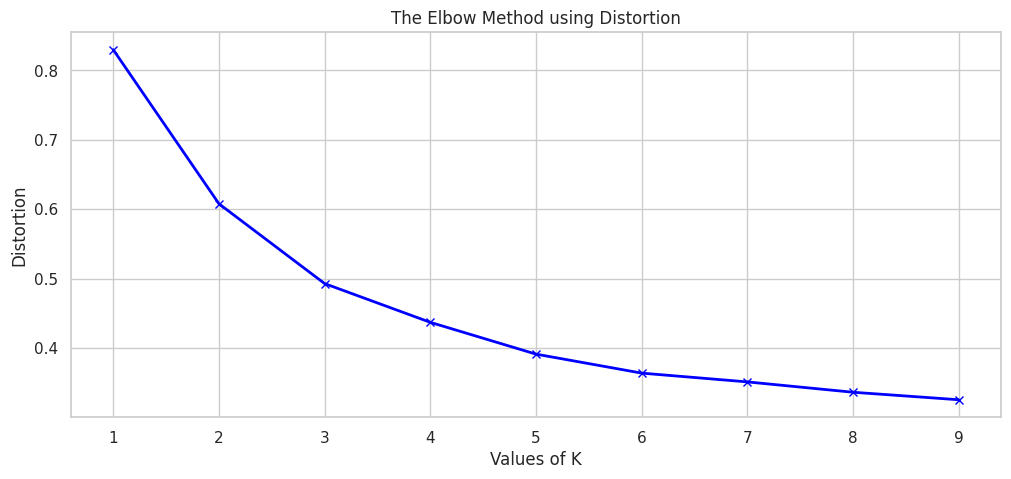

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 391.53380039292733
2 : 225.78108758528958
3 : 144.9718493374944
4 : 111.6580325749515
5 : 89.83561422293343
6 : 76.58356507213836
7 : 70.57874828306446
8 : 65.18114475500991
9 : 60.96907227170708


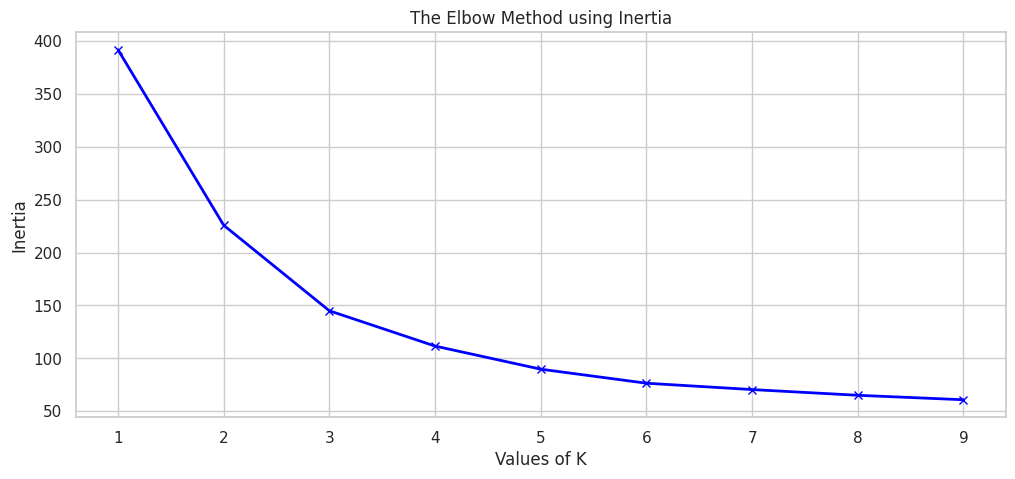

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
n_clusters = 5

In [ ]:
# fit kmeans and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_km.T) #.T transpose index and columns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
label = pd.Series(kmeans.labels_)

In [ ]:
label_count = label.groupby(label).count()
print(label_count)

0     74
1    106
2    101
3    132
4     96
dtype: int64


In [ ]:
colors = sns.color_palette('Set1', n_clusters)

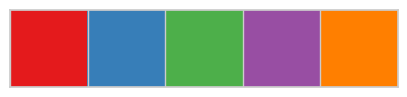

In [ ]:
sns.palplot(colors)

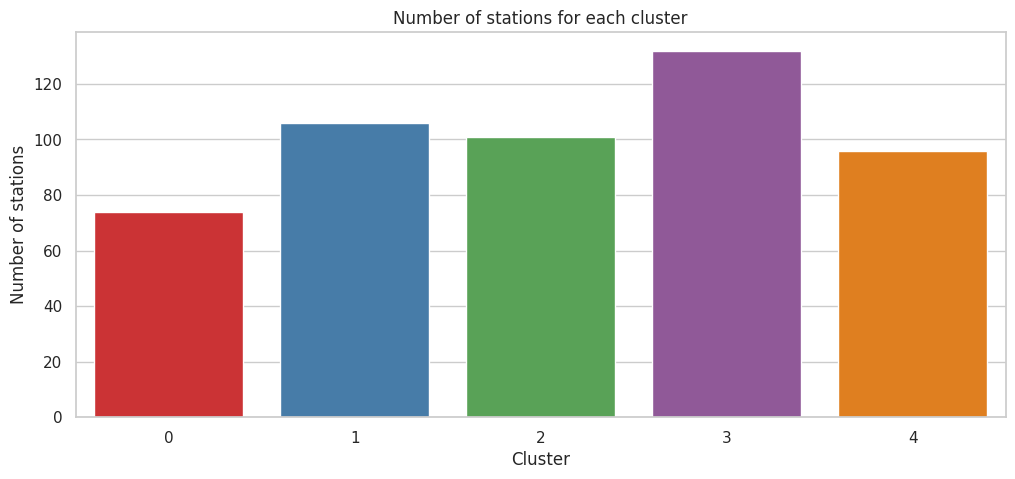

In [ ]:
sns.barplot(x=label_count.index, y=label_count, palette=colors)
plt.xlabel('Cluster')
plt.ylabel('Number of stations')
plt.title('Number of stations for each cluster')
plt.show()

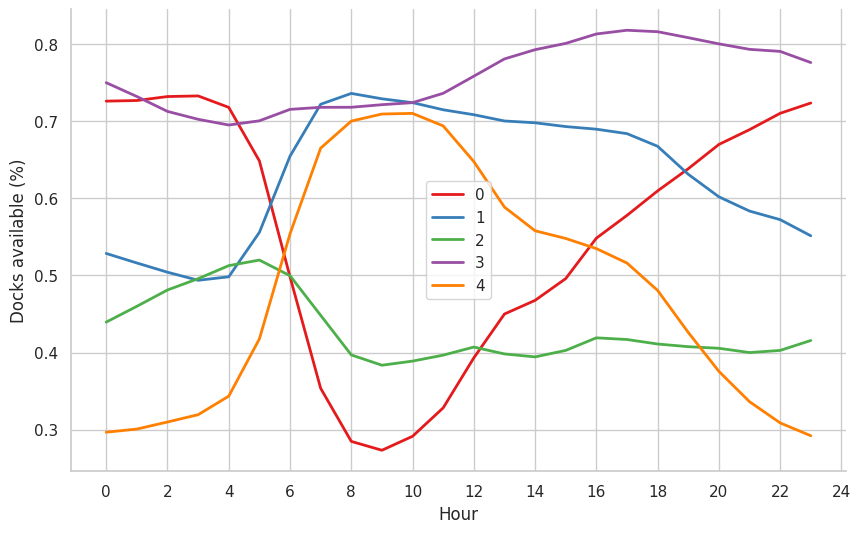

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for k, label, color in zip(kmeans.cluster_centers_, range(n_clusters), colors):
    plt.plot(k, color=color, label=label)

plt.legend()
plt.xlabel('Hour')
plt.xticks(np.linspace(0, 24, 13))
plt.ylabel('Docks available (%)')
sns.despine()

plt.savefig('/content/drive/My Drive/CapstoneProject_NathyDani/barcelona-pattern.png')

## Map with folium:

In [ ]:
df_label = pd.DataFrame({"label": kmeans.labels_}, index=df_km.columns)

In [ ]:
df_label

label
                           station_id       
percentage_docks_available 1               4
                           2               4
                           3               4
                           4               2
                           5               1
...                                      ...
                           515             1
                           516             2
                           517             2
                           518             3
                           519             3

[509 rows x 1 columns]

In [ ]:
df_stations_labels = pd.merge(df_stations, df_label, on='station_id', how='inner')
df_stations_labels.head()

,station_id,lat,lon,altitude,address,post_code,capacity,label
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,4
1,2,41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",8013,29,4
2,3,41.394156,2.181331,11.0,"C/ NÀPOLS, 82",8013,27,4
3,4,41.393317,2.181248,8.0,"C/ RIBES, 13",8013,21,2
4,5,41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39,1


In [ ]:
# Barcelona position
position = [41.390205, 2.154007]

In [ ]:
mp = folium.Map(location=position, zoom_start=13, tiles='cartodbpositron')

In [ ]:
hex_colors = colors.as_hex()

In [ ]:
for _,row in df_stations_labels.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=row['station_id'],
        color=hex_colors[row['label']],
        fill=True,
        fill_opacity=0.5,
        fill_color=hex_colors[row['label']]
    ).add_to(mp)

In [ ]:
mp

In [ ]:
df_labels = df_stations_labels[['station_id', 'label']]
df_labels

,station_id,label
0,1,4
1,2,4
2,3,4
3,4,2
4,5,1
...,...,...
504,515,1
505,516,2
506,517,2
507,518,3


In [ ]:
path = '/content/drive/My Drive/CapstoneProject_NathyDani/df_labels.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_labels.to_csv(f, index=False)